In [1]:
import sys

sys.path.append('../')

import keras4torch as k4t
import torch
from torch import nn
from sklearn.datasets import load_iris
import numpy as np
from keras4torch.metrics import *

In [2]:
X, y = load_iris(return_X_y=True)
X = X.astype(np.float32)
y = y.astype(np.int64)

In [3]:
import pandas
import numpy
pandas.__version__, numpy.__version__

('1.1.1', '1.19.1')

In [4]:
model = nn.Sequential(
    nn.Linear(4, 128), nn.ReLU(),
    nn.Sequential(
        nn.Linear(128, 64), nn.ReLU()
    ),
    nn.Linear(64, 3)
)

model = k4t.Model(model)

In [5]:
def accuracy(y_pred, y_true):
    right_cnt = (y_pred.argmax(-1) == y_true).sum()
    return right_cnt * 1.0 / y_true.shape[0]

model.compile(optimizer='adam', loss='ce_loss', metrics=['acc'])

In [6]:
model.summary(input_shape=[4])

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 128]                 640
├─ReLU: 1-2                              [-1, 128]                 --
├─Sequential: 1-3                        [-1, 64]                  --
|    └─Linear: 2-1                       [-1, 64]                  8,256
|    └─ReLU: 2-2                         [-1, 64]                  --
├─Linear: 1-4                            [-1, 3]                   195
Total params: 9,091
Trainable params: 9,091
Non-trainable params: 0
Total mult-adds (M): 0.02
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.04


In [7]:
history = model.fit(X, y,
            epochs=15,
            validation_split=0.2,
            )

Train on 120 samples, validate on 30 samples:
Epoch 1/15 - 0.0s - loss: 1.0691 - acc: 0.4219 - val_loss: 1.0273 - val_acc: 0.2667 - lr: 1e-03
Epoch 2/15 - 0.0s - loss: 0.9626 - acc: 0.3464 - val_loss: 0.9359 - val_acc: 0.3333 - lr: 1e-03
Epoch 3/15 - 0.0s - loss: 0.8875 - acc: 0.5625 - val_loss: 0.8338 - val_acc: 0.9667 - lr: 1e-03
Epoch 4/15 - 0.0s - loss: 0.8054 - acc: 0.8620 - val_loss: 0.7422 - val_acc: 0.7000 - lr: 1e-03
Epoch 5/15 - 0.0s - loss: 0.7417 - acc: 0.6562 - val_loss: 0.6606 - val_acc: 0.7000 - lr: 1e-03
Epoch 6/15 - 0.0s - loss: 0.6671 - acc: 0.6875 - val_loss: 0.5832 - val_acc: 0.8000 - lr: 1e-03
Epoch 7/15 - 0.0s - loss: 0.6059 - acc: 0.8385 - val_loss: 0.5159 - val_acc: 0.9333 - lr: 1e-03
Epoch 8/15 - 0.0s - loss: 0.5512 - acc: 0.9141 - val_loss: 0.4579 - val_acc: 0.9333 - lr: 1e-03
Epoch 9/15 - 0.0s - loss: 0.4996 - acc: 0.8958 - val_loss: 0.4136 - val_acc: 0.9000 - lr: 1e-03
Epoch 10/15 - 0.0s - loss: 0.4626 - acc: 0.9089 - val_loss: 0.3697 - val_acc: 0.9667 - lr:

<AxesSubplot:>

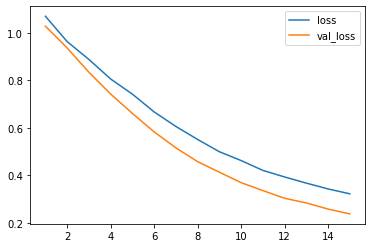

In [8]:
history.plot(kind='line', y=['loss', 'val_loss'])

In [9]:
model.evaluate(X, y)

OrderedDict([('loss', 0.2974995), ('acc', 0.975)])

In [10]:
model.predict(X)

array([[ 3.4327636 ,  0.414083  , -3.125235  ],
       [ 2.9688685 ,  0.48668045, -2.7657316 ],
       [ 3.151896  ,  0.39012975, -2.868496  ],
       [ 2.8372688 ,  0.45616138, -2.6346157 ],
       [ 3.4516    ,  0.38763434, -3.122476  ],
       [ 3.4830093 ,  0.49109596, -3.1822472 ],
       [ 3.1177921 ,  0.38167018, -2.8185751 ],
       [ 3.2384772 ,  0.44837993, -2.9707484 ],
       [ 2.707825  ,  0.439166  , -2.5154865 ],
       [ 2.9945025 ,  0.48393327, -2.791665  ],
       [ 3.6049018 ,  0.44427705, -3.2868547 ],
       [ 3.0458698 ,  0.45355672, -2.8055801 ],
       [ 2.979561  ,  0.46129447, -2.763496  ],
       [ 3.0198064 ,  0.33216327, -2.7254376 ],
       [ 4.127635  ,  0.4402938 , -3.6918712 ],
       [ 4.0784655 ,  0.42500818, -3.6387894 ],
       [ 3.7996626 ,  0.40927583, -3.4056048 ],
       [ 3.4011295 ,  0.4261555 , -3.0923862 ],
       [ 3.5775104 ,  0.53511494, -3.3024178 ],
       [ 3.5052843 ,  0.40361995, -3.1633694 ],
       [ 3.171152  ,  0.56482047, -2.982